<img src="./lecture_image/00_title.png">

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:30px; text-align: center;"><font size=4 color=blue><b>[19차시] 학습목표</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ Dlib 라이브러리를 사용할 수 있는 환경을 구축할 수 있다<br><br>
○ Dlib 라이브러리를 이용하여 얼굴을 검출할 수 있다 <br><br>
○ Dlib 라이브러리의 랜드마크를 이해하고 사용할 수 있다 </font></td></tr>   
</table>        

# 얼굴 검출 (Dlib 라이브러리 활용)

## Dlib 개요

- dlib는 얼굴영상에서 68개의 얼굴의 랜드마크 검출
- dlib 파일 다운로드 : https://pypi.org/project/dlib/
- 학습 데이터 모델 : http://dlib.net/files/shape_predictor_68_face_landmarks.dat.bz2

<img src="./lecture_image/19_dlib_randmark.png" width=50%>

- Visual Studiio 다운로드 : https://visualstudio.microsoft.com/ko/downloads/
- 실행 후에 C++를 이용한 데스크톱 개발를 선택하고 오른쪽의 선택된 옵션 (옵션을 보면, Windows용 C++ CMake 도구 선택)을 install 버튼을 클릭하여 설치

In [1]:
# 멀티플랫폼으로 사용할 수 있는 Make의 빌드관리시스템을 만들기 위한 오픈소스 프로젝트
!pip install cmake

     ---------------------------------------- 39.7/39.7 MB 5.9 MB/s eta 0:00:00


In [2]:
!pip install dlib

     ---------------------------------------- 3.2/3.2 MB 6.4 MB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for dlib: filename=dlib-19.24.0-cp37-cp37m-win_amd64.whl size=2918092 sha256=c398d023c46d838d9dd94a2bcdeec3dc1c0b1d94f2b87133fa8e34c4d51fd63c
  Stored in directory: c:\users\ai\appdata\local\pip\cache\wheels\33\2f\fb\0a707a1693b1f823c9755fc23143d787fa75ee3561d56e2bc5
Successfully built dlib


In [3]:
# OpenCV가 제공하는 기능 중에 복잡하고 사용성이 떨어지는 부분을 보완 (비디오 스트림 파일 처리 등)
!pip install imutils

## 랜드마크 검출

rectangles[[(233, 357) (788, 911)]]


(-0.5, 1023.5, 1023.5, -0.5)

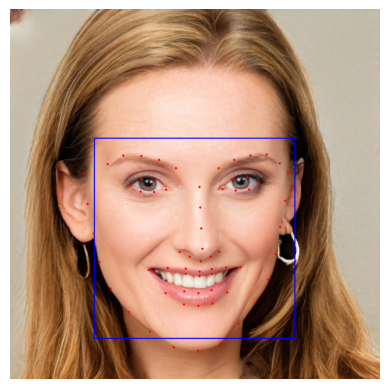

In [11]:
import dlib
import cv2
import imutils
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt

img =cv2.imread('./image/face2.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 검출기 생성
detector = dlib.get_frontal_face_detector()

#모델 업로드
predictor = dlib.shape_predictor("./model/shape_predictor_68_face_landmarks.dat")

# 랜드마크 추출
rects = detector(img_gray, 1)

print(rects)

# enumerate(): 값에 인덱스를 부여해서 반환
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255),2)
    
    # 랜드마크 검출
    shape = predictor(img_gray, rect)
    # shape 객체를 numpy 배열 변환
    shape = face_utils.shape_to_np(shape)
    
    for (x, y) in shape :
        cv2.circle(img, (x,y), 3, (255,0,0), -1)
    
plt.imshow(img)
plt.axis("off")

rectangles[[(191, 142) (414, 365)]]


(-0.5, 519.5, 692.5, -0.5)

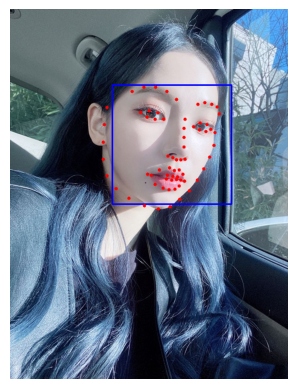

In [13]:
import dlib
import cv2
import imutils
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt

img =cv2.imread('./image/carina.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# 검출기 생성
detector = dlib.get_frontal_face_detector()

#모델 업로드
predictor = dlib.shape_predictor("./model/shape_predictor_68_face_landmarks.dat")

# 랜드마크 추출
rects = detector(img_gray, 1)

print(rects)

# enumerate(): 값에 인덱스를 부여해서 반환
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    
    cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255),2)
    
    # 랜드마크 검출
    shape = predictor(img_gray, rect)
    # shape 객체를 numpy 배열 변환
    shape = face_utils.shape_to_np(shape)
    
    for (x, y) in shape :
        cv2.circle(img, (x,y), 3, (255,0,0), -1)
    
plt.imshow(img)
plt.axis("off")

## 얼굴에 스티커 붙이기

- <font color=red>output = cv2.seamlessClone(src, dst, mask, center, flags)</font> 
  - src : 배경 이미지(dst)에 붙일 이미지 
  - dst : 배경 이미지
  - mask : src를 붙일 dst의 위치 마스트, src의 크기여야 함
  - center : src가 위치할 dst의 중심 위치
  - flags : 동작 방법 (NORMAL_CLONE, MIXED_CLONE)

rectangles[[(191, 142) (414, 365)]]
[317, 281]


(-0.5, 519.5, 692.5, -0.5)

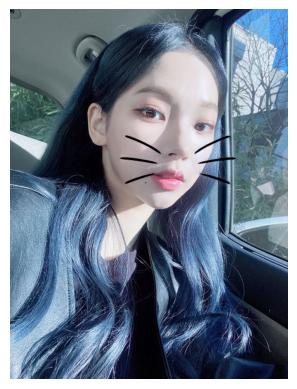

In [28]:
import dlib
import cv2
import imutils
import numpy as np
from imutils import face_utils
import matplotlib.pyplot as plt

img =cv2.imread('./image/carina.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

sticker = cv2.imread('./image/cat-whisker2.png')
sticker = cv2.cvtColor(sticker, cv2.COLOR_BGR2RGB)
# 검출기 생성
detector = dlib.get_frontal_face_detector()

#모델 업로드
predictor = dlib.shape_predictor("./model/shape_predictor_68_face_landmarks.dat")

# 랜드마크 추출
rects = detector(img_gray, 1)

print(rects)

# enumerate(): 값에 인덱스를 부여해서 반환
for (i, rect) in enumerate(rects):
    (x, y, w, h) = face_utils.rect_to_bb(rect)
    
    #스티커 이미지를 얼굴 영역에 맞게 조정
    sticker = cv2.resize(sticker, (w, h//2))
    #배경을 투명하게 하기 위한 마스크
    mask = 255 * np.ones(sticker.shape, sticker.dtype)
    
    # 랜드마크 검출
    shape = predictor(img_gray, rect)
    # shape 객체를 numpy 배열 변환
    shape = face_utils.shape_to_np(shape)
    
    # 스티커를 붙일 위치의 랜드마크를 설정
    center_x = shape[35][0]-13
    print(center)
    center = [center_x, shape[35][1]]
    
    img = cv2.seamlessClone(sticker, img, mask, center, cv2.MIXED_CLONE)
    
plt.imshow(img)
plt.axis("off")


## ROI 영역 표시하기 (눈썹, 눈, 코, 입)

In [8]:
def visualize_facial_landmarks(image, shape, colors=None, alpha=0.75):
    overlay = image.copy()
    output = image.copy()
    
    # 색상 코드
    if colors is None:
        colors = [(19, 199, 109), (79, 76, 240), (230, 159, 23),
                  (168, 100, 168), (158, 163, 32), (163, 38, 32),
                  (180, 42, 220), (0, 0, 255)]

    # 랜드마크 영역을 하나씩 가져옴
    for (i, name) in enumerate(FACIAL_LANDMARKS_IDXS.keys()):
        # 랜드마크 좌표 (x, y)를 반환
        (j, k) = FACIAL_LANDMARKS_IDXS[name]
        pts = shape[j:k]

        # 턱선을 표시하는 경우
        if name == "jaw":
            #pass
            # 턱선 좌표를 가져와서 열린 곡선으로 턱선을 그림
            for l in range(1, len(pts)):
                ptA = tuple(pts[l - 1])
                ptB = tuple(pts[l])
                cv2.line(overlay, ptA, ptB, colors[i], 2)
        else:
            # 랜드마크 영역의 윤곽선을 추출
            hull = cv2.convexHull(pts)
            # 랜드마크 영역을 윤곽선으로 그림         
            cv2.drawContours(overlay, [hull], -1, colors[i], -1)

    # 투명도를 적용하여 랜드마크 영역을 색칠함
    # overlay * alpha + output * (1 - alpha) + 0 * output
    cv2.addWeighted(overlay, alpha, output, 1 - alpha, 0, output)
    
    return output

visualize_facial_landmarks() 함수를 변경하고자 하는 경우에 활용하기 위한 코드 (필요시 코드 배포)

In [10]:
# 표시하고자 하는 랜드마크만 따로 정의해서 사용
from collections import OrderedDict

# 68개의 랜드마크 번호
FACIAL_LANDMARKS_68_IDXS = OrderedDict([
    ("mouth", (48, 68)),            # 입
    ("inner_mouth", (60, 68)),      # 안쪽 입
    ("right_eyebrow", (17, 22)),    # 눈썹
    ("left_eyebrow", (22, 27)), 
    ("right_eye", (36, 42)),        # 눈
    ("left_eye", (42, 48)),
    ("nose", (27, 36)),             # 코
    ("jaw", (0, 17))                # 턱
])

FACIAL_LANDMARKS_EYE_IDXS = OrderedDict([
    ("right_eye", (36, 42)),
    ("left_eye", (42, 48))
])

FACIAL_LANDMARKS_IDXS = FACIAL_LANDMARKS_68_IDXS

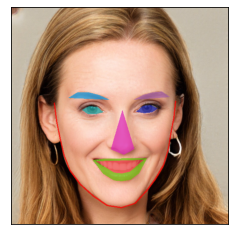

In [11]:
# 실습

<table border=1 width=100%>
    <tr><td style="border: 1px solid black; width:600px; height:40px; text-align: center;"><font size=4 color=blue><b>[19차시] 정리하기</b></font></td></tr>       
    <tr><td style="border: 1px solid black; text-align: left;"><font size=3>
○ dlib는 얼굴영상에서 68개의 얼굴의 랜드마크 검출<br><br>
○ <font color=red>output = cv2.seamlessClone(src, dst, mask, center, flags)</font> : 배경 이미지에 다른 이미지를 붙임
        </font></td></tr>   
</table>